<a href="https://colab.research.google.com/github/kywch/StreetPsych/blob/master/visualize_expert_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
from matplotlib import colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
# download the ratings data
!wget https://github.com/kywch/StreetPsych/raw/master/street_psych_ratings.zip

--2020-11-18 19:56:35--  https://github.com/kywch/StreetPsych/raw/master/street_psych_ratings.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kywch/StreetPsych/master/street_psych_ratings.zip [following]
--2020-11-18 19:56:36--  https://raw.githubusercontent.com/kywch/StreetPsych/master/street_psych_ratings.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 437066 (427K) [application/zip]
Saving to: ‘street_psych_ratings.zip’

street_psych_rating 100%[===================>] 426.82K  --.-KB/s    in 0.04s   

2020-11-18 19:56:36 (9.43 MB/s) - ‘street_psych_ratings.zip’ saved [437066/437066]



In [6]:
#!ls
!unzip street_psych_ratings.zip
!mv 02_derivatives/ data

Archive:  street_psych_ratings.zip
  inflating: 02_derivatives/Expert1_score_choice_probability.csv  
  inflating: 02_derivatives/Expert1_score_trueskill.csv  
  inflating: 02_derivatives/Expert2_score_choice_probability.csv  
  inflating: 02_derivatives/Expert2_score_trueskill.csv  
  inflating: 02_derivatives/Expert3_score_choice_probability.csv  
  inflating: 02_derivatives/Expert3_score_trueskill.csv  
  inflating: 02_derivatives/Mturk_score_choice_probability.csv  
  inflating: 02_derivatives/Mturk_score_reliability.csv  
  inflating: 02_derivatives/Mturk_score_trueskill.csv  
data  sample_data  street_psych_ratings.zip


In [7]:
!ls data

02_derivatives			      Expert3_score_choice_probability.csv
Expert1_score_choice_probability.csv  Expert3_score_trueskill.csv
Expert1_score_trueskill.csv	      Mturk_score_choice_probability.csv
Expert2_score_choice_probability.csv  Mturk_score_reliability.csv
Expert2_score_trueskill.csv	      Mturk_score_trueskill.csv


# Load the ratings data

To see and sort the images by these ratings, visit
* Mturk ratings: https://kywch.github.io/StreetPsych/visualize.html
* Ratings by Expert 1: https://kywch.github.io/StreetPsych/visualize_expert1.html
* Ratings by Expert 2: https://kywch.github.io/StreetPsych/visualize_expert2.html
* Ratings by Expert 3: https://kywch.github.io/StreetPsych/visualize_expert3.html

Note that there are two different ratings. Choice probability ratings are more intuitive but skewed and discrete. TrueSkill ratings are less intuitive but more fine-grained and more normal.
* **Choice Probability**: In each trial, participants were shown 12 images in a 4x3 grid and asked to choose four images that they evaluate highly on that dimension/question. The probability of selecting each image across participants, i.e., choice probability, was used to quantify how much that image represented that dimension.  
* **TrueSkill**: The score is calculated by transforming clicks into winner (clicked) -- loser (not clicked) pairs then feeding those into the TrueSkill algorithm. http://www.moserware.com/2010/03/computing-your-skill.html, https://trueskill.org/ 


In [9]:
mturk_data = pd.read_csv('data/Mturk_score_trueskill.csv', index_col='Image_ID')
expert1_data = pd.read_csv('data/Expert1_score_trueskill.csv', index_col='Image_ID')
expert2_data = pd.read_csv('data/Expert2_score_trueskill.csv', index_col='Image_ID')
expert3_data = pd.read_csv('data/Expert3_score_trueskill.csv', index_col='Image_ID')

# Correlations between Mturk ratings (TrueSkill)

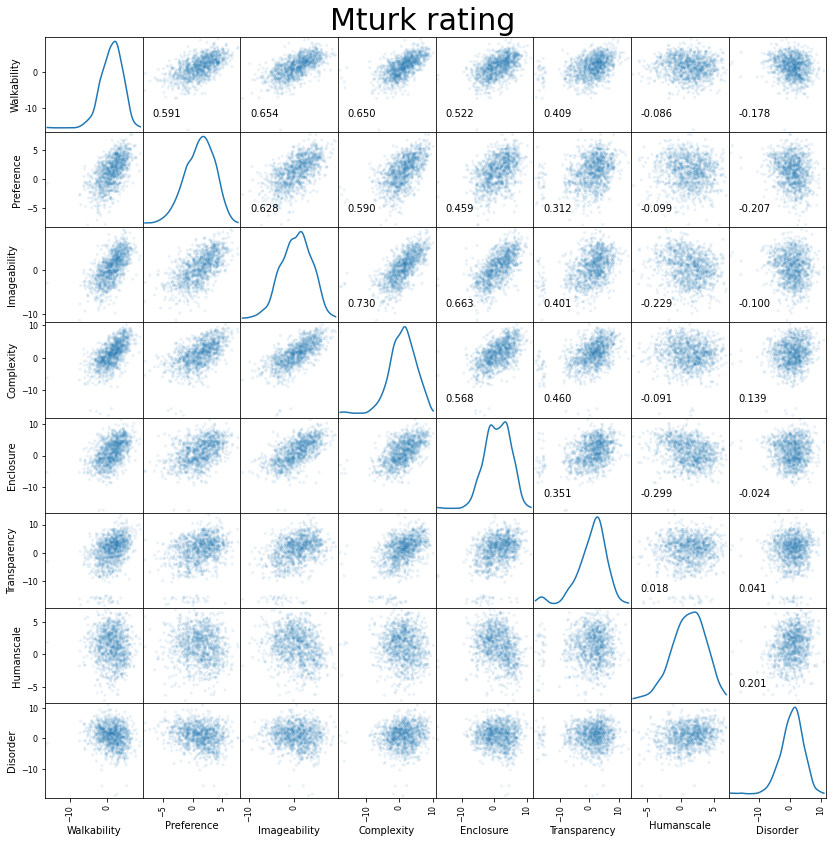

In [28]:
# Mturk rating
axes = scatter_matrix(mturk_data, alpha=0.1, figsize=(14,14), diagonal='kde')
corr = mturk_data.corr(method='spearman')
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr.iloc[i,j], (0.1, 0.2), xycoords='axes fraction', ha='left', va='center')
plt.suptitle('Mturk rating', y=0.91, fontsize=30)
plt.show()

# Between-expert rating agreements (TrueSkill)

In [16]:
xx = mturk_data.corr(method='spearman')

In [18]:
xx.iloc[1,1]

1.0

# Mturk-expert rating agreements (TrueSkill)

# Mturk split-participant vs. between-expert agreements